# Data Science - Just Sampling

### Import

In [2]:
pip install imblearn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Import문 - Import 추가로 할게 있다면 여기다가 해주세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample #추가


#샘플링 관련 라이브러리들
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


### 함수선언은 여기에 해주면 됨

In [4]:
#인코딩 / 라벨링함수
def encode_and_transform_datas(df):
    # 1. 라벨 인코딩할 열들 지정
    label_cols = ['Card Brand', 'Card Type', 'Error Message', 'Is Fraud?']
    
    # 2. 각 열에 대해 라벨 인코딩 수행
    label_encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # 나중에 필요하면 인코더 저장 (복원할 때 사용 가능)
    
    # 3. 날짜 데이터를 8자리 숫자로 변환
    # 'Expires' 변환 (MM/YYYY -> YYYYMMDD)
    df['Expires'] = df['Expires'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 'Acct Open Date' 변환 (MM/YYYY -> YYYYMMDD)
    df['Acct Open Date'] = df['Acct Open Date'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 날짜 형식을 int 타입으로 변환
    df['Expires'] = df['Expires'].astype(int)
    df['Acct Open Date'] = df['Acct Open Date'].astype(int)
    
    # 인코딩된 데이터프레임 반환
    return df
#Is Fraud : Yes-1, No-0으로 Labeled


In [5]:
#Correlation Matrix 출력함수
def correlation_write(df, path='/Users/gidaseul/Documents/GitHub/DS/datas/파생/correlation_matrix.csv'):
    # 상관관계 계산
    correlation_matrix = df.corr()
    
    # 상관관계 결과를 CSV로 저장
    correlation_matrix.to_csv(path)
    
    # 히트맵 그리기
    plt.figure(figsize=(10, 8)) 
    plt.title("Correlation Heatmap", fontsize=16)
    
    # Seaborn 히트맵 사용 (각 칸에 상관계수 표시)
    sns.heatmap(
        correlation_matrix, 
        annot=True,          # 상관계수 표시
        cmap='coolwarm', 
        linewidths=0.5, 
        fmt=".2f",           # 소수점 둘째 자리까지 표시
        annot_kws={"size": 10} # 상관계수 숫자의 글꼴 크기 지정
    )

    plt.tight_layout()
    plt.show()

In [6]:
# Classification Report, Confusion Matrix 출력함수
def print_classification_report_and_confusion_matrix(model, X_test, y_test):
    # 예측값 생성
    y_pred = model.predict(X_test)
    
    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # 분류 리포트 출력 (Precision, Recall, F1-score 등)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix 출력
    cm = confusion_matrix(y_test, y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix.plot(cmap='coolwarm')
    for text in matrix.text_.ravel():
        text.set_color("black")
    plt.grid(False)
    plt.show()


In [14]:
#샘플링 관련 함수들 모음 - 기다슬
# 샘플링 함수 정의
def apply_undersampling(X, y):
    fraud_data = X[y == 1]
    non_fraud_data = X[y == 0]
    non_fraud_sample = resample(non_fraud_data, replace=False, n_samples=len(fraud_data), random_state=42)
    X_undersampled = pd.concat([fraud_data, non_fraud_sample])
    y_undersampled = pd.Series([1] * len(fraud_data) + [0] * len(non_fraud_sample))
    return X_undersampled, y_undersampled

def apply_oversampling(X, y):
    fraud_data = X[y == 1]
    non_fraud_data = X[y == 0]
    fraud_sample = resample(fraud_data, replace=True, n_samples=len(non_fraud_data), random_state=42)
    X_oversampled = pd.concat([fraud_sample, non_fraud_data])
    y_oversampled = pd.Series([1] * len(fraud_sample) + [0] * len(non_fraud_data))
    return X_oversampled, y_oversampled

def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    return X_smote, y_smote


In [12]:
# #샘플링 관련 함수들 모음
# # 언더샘플링 함수
# def apply_undersampling(X, y):
#     rus = RandomUnderSampler(random_state=42)
#     X_res, y_res = rus.fit_resample(X, y)
#     return X_res, y_res

# # 오버샘플링 함수
# def apply_oversampling(X, y):
#     ros = RandomOverSampler(random_state=42)
#     X_res, y_res = ros.fit_resample(X, y)
#     return X_res, y_res

# # SMOTE 함수
# def apply_smote(X, y):
#     smote = SMOTE(random_state=42)
#     X_res, y_res = smote.fit_resample(X, y)
#     return X_res, y_res

---
---
---  

### 여기서부터가 찐구현
#### 데이터 불러오기

Index(['User', 'Gender', 'Current Age', 'Retirement Age', 'Birth Year',
       'Birth Month', 'Zipcode', 'Per Capita Income - Zipcode',
       'Yearly Income', 'Total Debt', 'Credit Score', 'Year', 'Month', 'Day',
       'Merchandise Code', 'Card', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'Has Chip', 'Credit Limit', 'Acct Open Date',
       'Year PIN last Changed', 'Amount', 'Whether Security Chip is Used',
       'Error Message', 'Is Fraud?'],
      dtype='object')


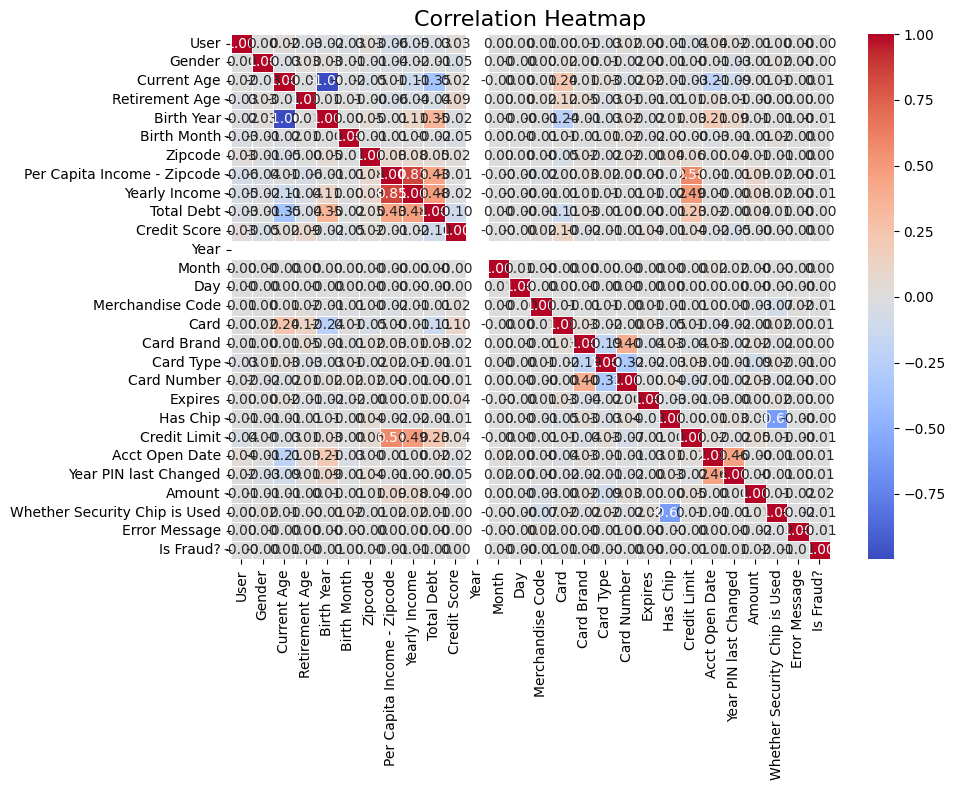

In [29]:
train_data = pd.read_csv('/Users/gidaseul/Documents/GitHub/DS/datas/train.csv')
encode_and_transform_datas(train_data)
print(train_data.columns)
correlation_write(train_data)

<span style="color:red">여기가 내가 추가한 샘플링 코드</span>

#### Train / Test Dataset 분리하기
<span style='color:red'>+샘플링 적용하였음.</span>

In [15]:
X = train_data.drop(columns=['Is Fraud?'])
y = train_data['Is Fraud?']


# 언더샘플링 적용
X_undersampled, y_undersampled = apply_undersampling(X, y)

# 오버샘플링 적용
X_oversampled, y_oversampled = apply_oversampling(X, y)

# SMOTE 적용
X_smote, y_smote = apply_smote(X, y)

# 각각의 샘플링 방법으로 나눈 데이터를 train_test_split 사용 가능
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [16]:
# 샘플링 결과에 따라 데이터를 train/test 셋으로 분할
sampling_methods = {
    'undersampling': (X_undersampled, y_undersampled),
    'oversampling': (X_oversampled, y_oversampled),
    'smote': (X_smote, y_smote)
}

--- undersampling ---
Logistic Regression Results:
Accuracy: 0.4910

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       684
           1       0.00      0.00      0.00       709

    accuracy                           0.49      1393
   macro avg       0.25      0.50      0.33      1393
weighted avg       0.24      0.49      0.32      1393



/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


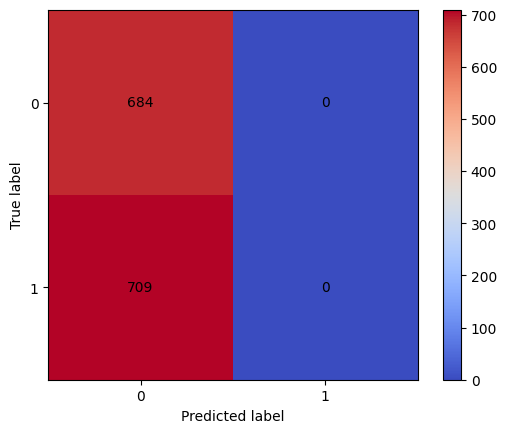

Random Forest Results:
Accuracy: 0.9490

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       684
           1       0.93      0.98      0.95       709

    accuracy                           0.95      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.95      0.95      0.95      1393



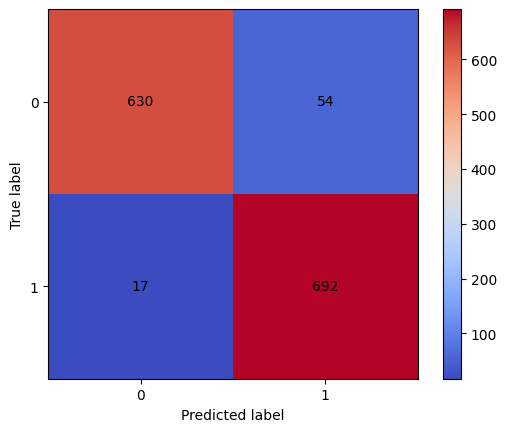

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.110130
24                         Amount    0.061805
21                   Credit Limit    0.053524
0                            User    0.050563
22                 Acct Open Date    0.050215
10                   Credit Score    0.049606
7     Per Capita Income - Zipcode    0.048951
9                      Total Debt    0.048356
18                    Card Number    0.047978
6                         Zipcode    0.046858
8                   Yearly Income    0.046176
12                          Month    0.044854
2                     Current Age    0.044776
19                        Expires    0.044146
4                      Birth Year    0.041825
23          Year PIN last Changed    0.034375
13                            Day    0.033467
3                  Retirement Age    0.030510
5                     Birth Month    0.028982
25  Whether Security Chip is Used    0.028086
15           

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


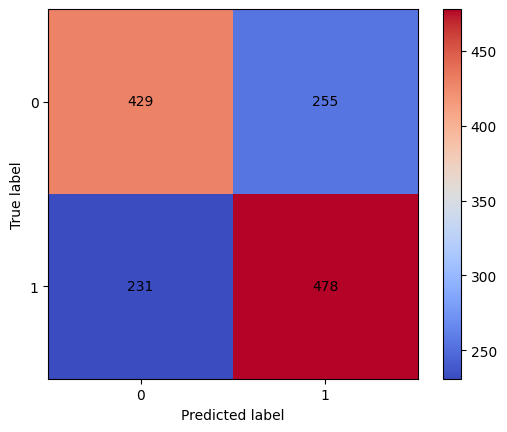



--- oversampling ---
Logistic Regression Results:
Accuracy: 0.4999

Classification Report:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492657
           1       0.00      0.00      0.00    492812

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469



/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


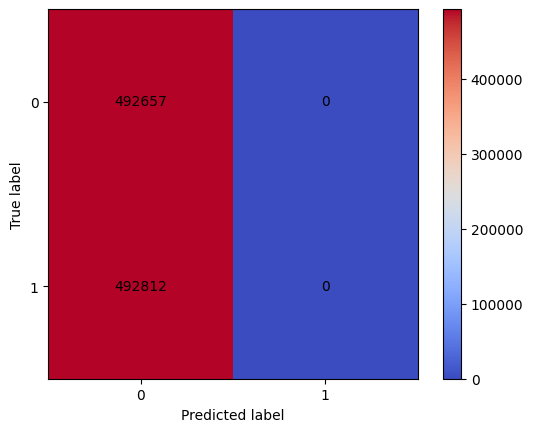

Random Forest Results:
Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492657
           1       1.00      1.00      1.00    492812

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469



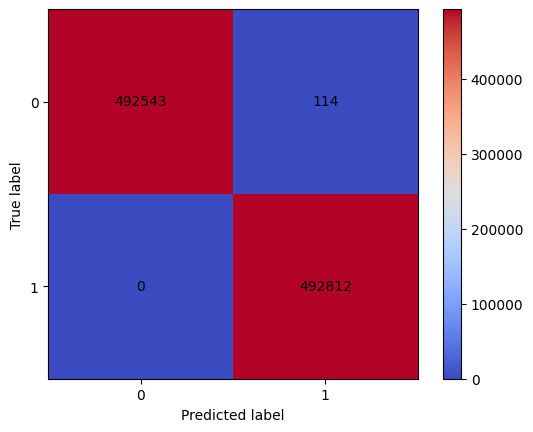

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.137378
12                          Month    0.059703
21                   Credit Limit    0.053102
0                            User    0.051322
18                    Card Number    0.051145
22                 Acct Open Date    0.050566
8                   Yearly Income    0.046426
6                         Zipcode    0.045642
7     Per Capita Income - Zipcode    0.045506
10                   Credit Score    0.044880
19                        Expires    0.043451
9                      Total Debt    0.042634
4                      Birth Year    0.042157
24                         Amount    0.040498
2                     Current Age    0.038176
25  Whether Security Chip is Used    0.036891
23          Year PIN last Changed    0.032867
3                  Retirement Age    0.028840
5                     Birth Month    0.028120
13                            Day    0.025206
15           

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.6595

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    492657
           1       0.65      0.68      0.67    492812

    accuracy                           0.66    985469
   macro avg       0.66      0.66      0.66    985469
weighted avg       0.66      0.66      0.66    985469



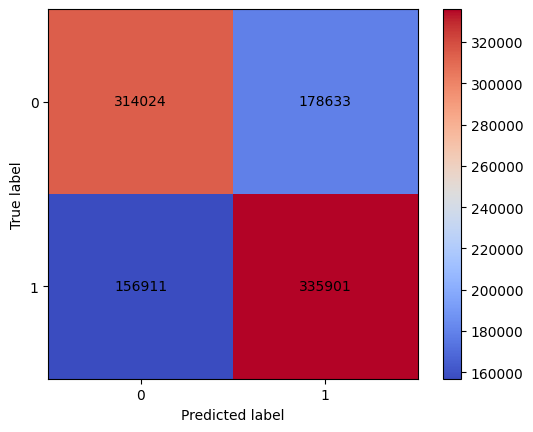



--- smote ---
Logistic Regression Results:
Accuracy: 0.5001

Classification Report:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492854
           1       0.00      0.00      0.00    492615

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469



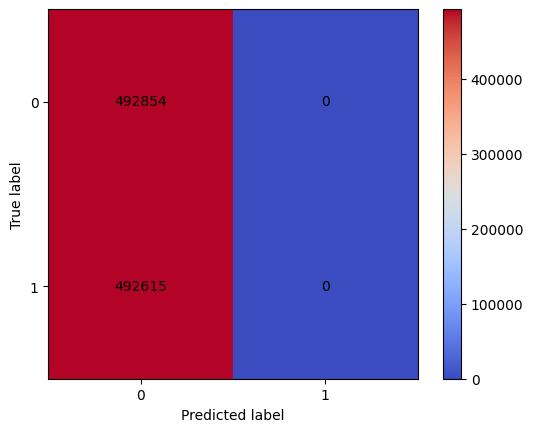

Random Forest Results:
Accuracy: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492854
           1       1.00      1.00      1.00    492615

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469



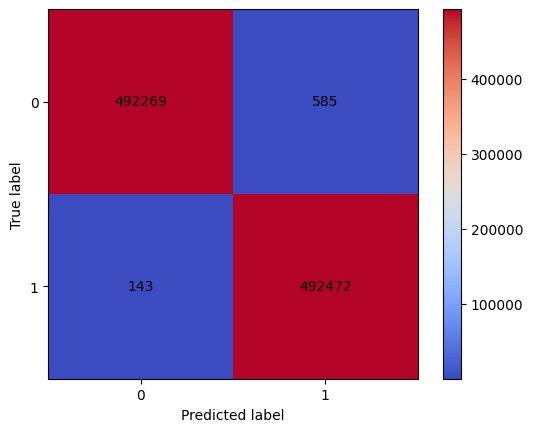

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.193175
12                          Month    0.052602
21                   Credit Limit    0.050432
18                    Card Number    0.047586
0                            User    0.047531
22                 Acct Open Date    0.046106
7     Per Capita Income - Zipcode    0.043898
10                   Credit Score    0.043542
8                   Yearly Income    0.043189
6                         Zipcode    0.042227
19                        Expires    0.041608
9                      Total Debt    0.041006
4                      Birth Year    0.038124
2                     Current Age    0.035262
25  Whether Security Chip is Used    0.035004
24                         Amount    0.032094
23          Year PIN last Changed    0.029758
5                     Birth Month    0.026275
3                  Retirement Age    0.026062
13                            Day    0.020814
15           

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.6783

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67    492854
           1       0.67      0.70      0.68    492615

    accuracy                           0.68    985469
   macro avg       0.68      0.68      0.68    985469
weighted avg       0.68      0.68      0.68    985469



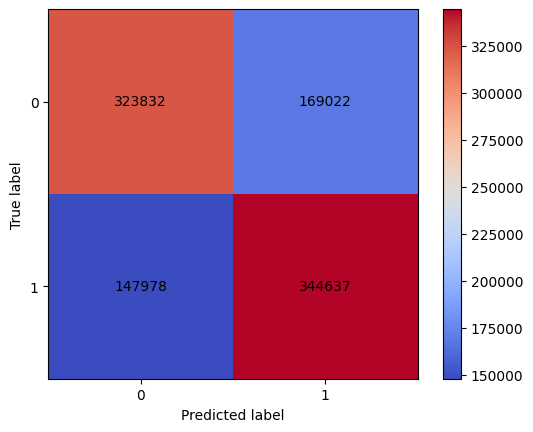

In [17]:
# 모델 학습 및 평가
for method_name, (X_sampled, y_sampled) in sampling_methods.items():
    print(f"--- {method_name} ---")
    
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
    
    # 로지스틱회귀
    print("Logistic Regression Results:")
    model = LogisticRegression(penalty='l2', fit_intercept=False, class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(model, X_test, y_test)
    
    # 랜덤포레스트
    print("Random Forest Results:")
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(rf, X_test, y_test)
    
    # Feature Importance 출력
    importances = rf.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importances)
    
    # SVM(Linear)
    print("Linear SVC Results:")
    svm = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', class_weight='balanced', dual=False, max_iter=1000))
    svm.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(svm, X_test, y_test)

    print("\n" + "="*50 + "\n")

# 언더샘플링 후 오버 샘플링

In [23]:
# 언더샘플링 후 오버샘플링 함수 정의
def undersample_then_oversample(X, y, normal_ratio=1.0):
    fraud_data = X[y == 1]
    non_fraud_data = X[y == 0]
    non_fraud_sample = resample(non_fraud_data, replace=False, n_samples=int(len(fraud_data) * normal_ratio), random_state=42)
    X_undersampled = pd.concat([fraud_data, non_fraud_sample])
    y_undersampled = pd.Series([1] * len(fraud_data) + [0] * len(non_fraud_sample))
    smote = SMOTE(random_state=42)
    X_combined, y_combined = smote.fit_resample(X_undersampled, y_undersampled)
    return X_combined, y_combined

# 오버 샘플링 후 언더 샘플링

In [24]:

# 오버샘플링 후 언더샘플링 함수 정의
def oversample_then_undersample(X, y, normal_ratio=1.0):
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    fraud_data = X_smote[y_smote == 1]
    non_fraud_data = X_smote[y_smote == 0]
    non_fraud_sample = resample(non_fraud_data, replace=False, n_samples=int(len(fraud_data) * normal_ratio), random_state=42)
    X_combined = pd.concat([fraud_data, non_fraud_sample])
    y_combined = pd.Series([1] * len(fraud_data) + [0] * len(non_fraud_sample))
    return X_combined, y_combined

In [25]:

# 각 샘플링 적용
X_combined_1, y_combined_1 = undersample_then_oversample(X, y)
X_combined_2, y_combined_2 = oversample_then_undersample(X, y)

# 샘플링 결과에 따라 데이터를 train/test 셋으로 분할
sampling_methods = {
    'undersample_then_oversample': (X_combined_1, y_combined_1),
    'oversample_then_undersample': (X_combined_2, y_combined_2)
}

In [26]:
# 모델 학습 및 평가
def print_classification_report_and_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

for method_name, (X_sampled, y_sampled) in sampling_methods.items():
    print(f"--- {method_name} ---")
    
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
    
    # 로지스틱 회귀
    print("Logistic Regression Results:")
    model = LogisticRegression(penalty='l2', fit_intercept=False, class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(model, X_test, y_test)
    
    # 랜덤 포레스트
    print("Random Forest Results:")
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(rf, X_test, y_test)
    
    # Feature Importance 출력
    importances = rf.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importances)
    
    # SVM(Linear)
    print("Linear SVC Results:")
    svm = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', class_weight='balanced', dual=False, max_iter=1000))
    svm.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(svm, X_test, y_test)

    print("\n" + "=" * 50 + "\n")

--- undersample_then_oversample ---
Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       684
           1       0.00      0.00      0.00       709

    accuracy                           0.49      1393
   macro avg       0.25      0.50      0.33      1393
weighted avg       0.24      0.49      0.32      1393

Confusion Matrix:
[[684   0]
 [709   0]]
Random Forest Results:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       684
           1       0.93      0.98      0.95       709

    accuracy                           0.95      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.95      0.95      0.95      1393

Confusion Matrix:
[[630  54]
 [ 17 692]]
Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.110130
24                         Amount    0.061805
21                   Credit Limit    0.053524
0                            User    0.050563
22                 Acct Open Date    0.050215
10                   Credit Score    0.049606
7     Per Capita Income - Zipcode    0.048951
9                      Total Debt    0.048356
18                    Card Number    0.047978
6                         Zipcode    0.046858
8                   Yearly Income    0.046176
12                          Month   

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression Results:
Classification Report:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492657
           1       0.00      0.00      0.00    492812

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469

Confusion Matrix:
[[492657      0]
 [492812      0]]
Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492657
           1       1.00      1.00      1.00    492812

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469

Confusion Matrix:
[[492063    594]
 [   113 492699]]
Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.172366
12                          Month    0.053913
21                   Credit Limit  

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67    492657
           1       0.67      0.70      0.68    492812

    accuracy                           0.68    985469
   macro avg       0.68      0.68      0.68    985469
weighted avg       0.68      0.68      0.68    985469

Confusion Matrix:
[[322952 169705]
 [147759 345053]]




# 샘플링에서 언더+오버를 하는데 각 전체 샘플링의 절반씩 해서 비율을 1:1로 하는 기법

In [47]:
train_data = pd.read_csv('/Users/gidaseul/Documents/GitHub/DS/datas/train.csv')
fraud_counts = train_data['Is Fraud?'].value_counts()

print(fraud_counts)


Is Fraud?
No     1642447
Yes       2321
Name: count, dtype: int64


문제의 원인:
balanced_mixed_sampling 함수에서 소수 클래스 데이터만 따로 SMOTE로 증강하려고 했어. 하지만 SMOTE는 두 클래스가 모두 포함된 데이터셋을 입력받아야 정상적으로 작동해.
SMOTE는 소수 클래스 데이터만 증강하는 것이 아니라 두 클래스 간의 경계를 활용해 새로운 소수 클래스 샘플을 생성하기 때문에, 다수 클래스 데이터도 포함된 상태에서 사용해야 해.
해결 방법:
SMOTE는 전체 데이터에 대해 먼저 적용한 후, 소수 클래스와 다수 클래스의 비율을 맞추는 것이 맞아. 이를 위해 코드 구조를 약간 수정할게.

In [64]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import pandas as pd

def balanced_mixed_sampling(X, y, target_ratio=0.5, random_state=42):
    """
    SMOTE로 소수 클래스를 증강한 후, 다수 클래스를 언더샘플링하여 중간 지점에서 균형을 맞추는 함수.
    :param X: 입력 특성 데이터프레임
    :param y: 타겟 레이블 시리즈 (0과 1)
    :param target_ratio: 최종적으로 두 클래스의 비율을 맞추기 위한 목표 비율
    :param random_state: 랜덤 시드
    :return: 균형 잡힌 X, y
    """
    # 목표 수 계산: 중간 지점으로 맞추기 위한 target_size
    num_class_0 = sum(y == 0)
    num_class_1 = sum(y == 1)
    target_size = int((num_class_0 + num_class_1) * target_ratio)

    # Step 1: SMOTE 적용 (전체 데이터에 대해)
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Step 2: SMOTE 적용 후, 다수 클래스와 소수 클래스 분리
    class_0_resampled = X_resampled[y_resampled == 0]
    class_1_resampled = X_resampled[y_resampled == 1]

    # 다수 클래스 언더샘플링
    class_0_sample = resample(class_0_resampled, replace=False, n_samples=target_size, random_state=random_state)

    # 소수 클래스는 오버샘플링 후 필요한 수만큼만 샘플링
    class_1_sample = class_1_resampled.sample(n=target_size, random_state=random_state).reset_index(drop=True)

    # 결합 및 결과 반환
    X_combined = pd.concat([class_0_sample, class_1_sample]).reset_index(drop=True)
    y_combined = pd.Series([0] * len(class_0_sample) + [1] * len(class_1_sample)).reset_index(drop=True)
    
    return X_combined, y_combined


In [65]:
# 데이터 준비
X = train_data.drop(columns=['Is Fraud?'])
y = train_data['Is Fraud?'].apply(lambda x: 1 if x == 'Yes' else 0)  # 'Yes'는 1, 'No'는 0으로 변환

# 범주형 데이터를 원-핫 인코딩으로 변환
X_encoded = pd.get_dummies(X)


In [66]:
# 샘플링 적용
X_balanced, y_balanced = balanced_mixed_sampling(X_encoded, y, target_ratio=0.2)

# 샘플링 결과 확인
print("After Sampling:")
print(y_balanced.value_counts())  # 각 클래스의 샘플 수가 target_ratio에 따라 결정됨


After Sampling:
0    328953
1    328953
Name: count, dtype: int64


In [54]:
# 샘플링된 데이터를 train/test 셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)


혼동 행렬 및 분류 리포트 함수 정의
모델 평가 결과를 텍스트로 출력하고 혼동 행렬을 시각화하는 함수를 정의한다.



In [67]:
# 혼동 행렬 및 분류 리포트를 시각화하는 함수 정의
def print_classification_report_and_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Classification Report 출력
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix 생성 및 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Feature Importance 시각화 함수 정의
랜덤 포레스트 모델의 중요한 특징을 시각화하는 함수를 정의한다.

In [68]:
# Feature Importance 시각화
def plot_feature_importances(importances, feature_names):
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()


모델 학습 및 평가
로지스틱 회귀, 랜덤 포레스트, SVM 모델을 학습하고 각 모델의 성능을 평가한다.

Logistic Regression Results:
Classification Report:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492735
           1       0.00      0.00      0.00    492734

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469



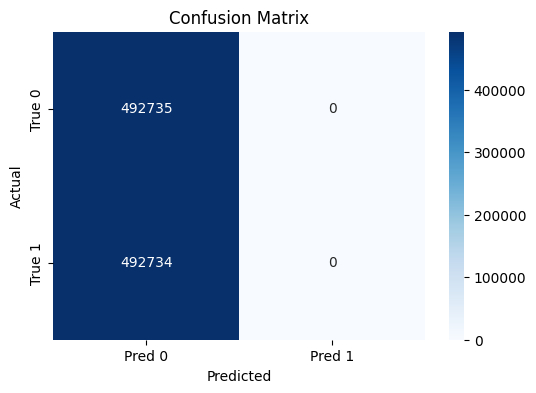

Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492735
           1       1.00      1.00      1.00    492734

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469



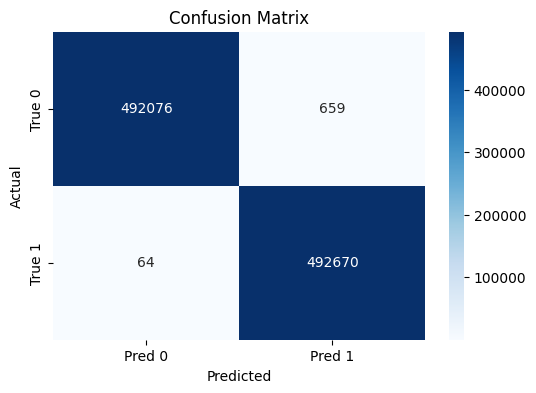

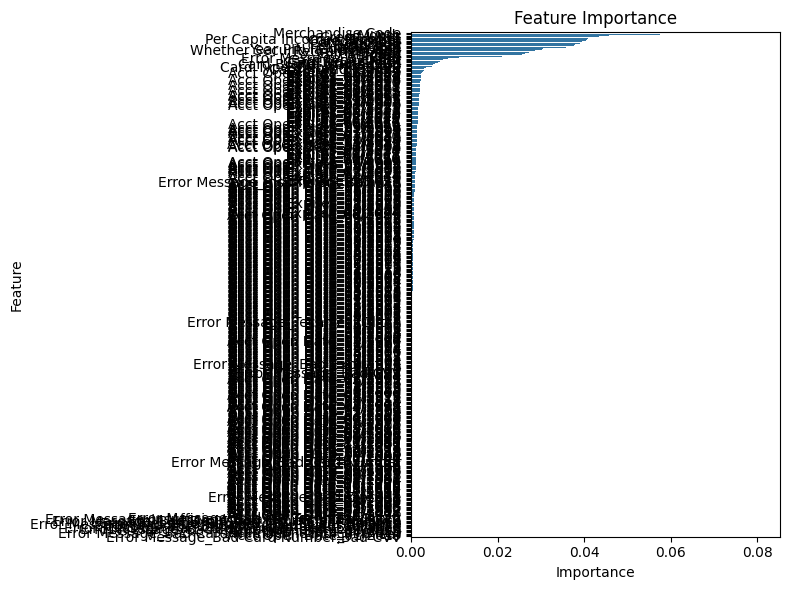

Linear SVC Results:


/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80    492735
           1       0.78      0.88      0.82    492734

    accuracy                           0.81    985469
   macro avg       0.82      0.81      0.81    985469
weighted avg       0.82      0.81      0.81    985469



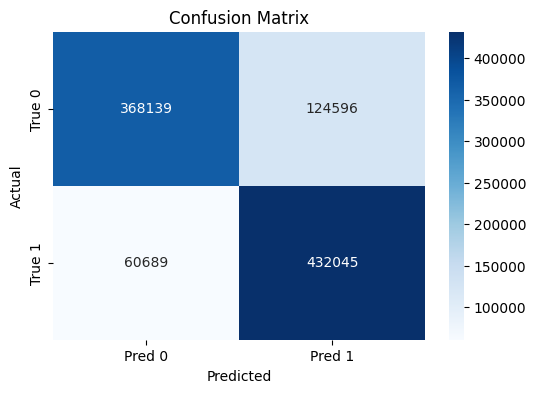

In [69]:
# 로지스틱 회귀
print("Logistic Regression Results:")
model = LogisticRegression(penalty='l2', fit_intercept=False, class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
print_classification_report_and_confusion_matrix(model, X_test, y_test)

# 랜덤 포레스트
print("Random Forest Results:")
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
print_classification_report_and_confusion_matrix(rf, X_test, y_test)

# Feature Importance 출력 및 시각화
importances = rf.feature_importances_
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])
plot_feature_importances(importances, feature_names)

# SVM (Linear)
print("Linear SVC Results:")
svm = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', class_weight='balanced', dual=False, max_iter=1000))
svm.fit(X_train, y_train)
print_classification_report_and_confusion_matrix(svm, X_test, y_test)

print("\n" + "=" * 50 + "\n")
